In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the dataset

In [2]:
train = pd.read_csv('train_v2.csv')
test = pd.read_csv('test_v2.csv')
submission_file = pd.read_csv('SubmissionFile.csv')

### Exploratory Data Analysis

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
print(train.shape)
print(train.columns)

(23524, 13)
Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')


#### The dataset contains 12 independent features and the target features(bank account)

In [5]:
print("The train dataset missing value analysis: ")
print(train.isna().sum())
print("The train dataset missing value analysis: ")
print(test.isna().sum())

The train dataset missing value analysis: 
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64
The train dataset missing value analysis: 
country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


#### Both the train and test dataset does not contain missing value

In [6]:
print(test.shape)
print(test.columns)

(10086, 12)
Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')


In [7]:
# Concatenate train and test data set for easy data preprocessing
df = pd.concat([train, test])
print(df.shape)
df.columns

(33610, 13)


Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [8]:
df.nunique()

country                       4
year                          3
uniqueid                  12480
bank_account                  2
location_type                 2
cellphone_access              2
household_size               20
age_of_respondent            85
gender_of_respondent          2
relationship_with_head        6
marital_status                5
education_level               6
job_type                     10
dtype: int64

In [9]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

### Visualization

Text(0.5, 1.0, 'Bank Account')

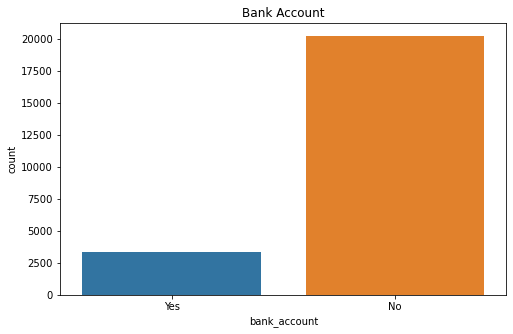

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='bank_account', data=df)
plt.title("Bank Account")

#### The dataset is imbalanced i.e it is skewed towards the No feature. Oversampling (or undersampling) technniques e.g SMOTE or class weight adjustment can be used to handle this skewness.

Text(0.5, 1.0, 'Age of Respondent')

<Figure size 576x360 with 0 Axes>

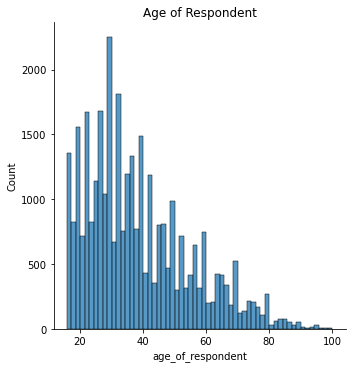

In [11]:
plt.figure(figsize=(8,5))
sns.displot(x='age_of_respondent', data=df)
plt.title("Age of Respondent")

#### The 'age_of_respondent' feature is slightly skewed to the right. We can perform log transformation to make the distribution normal

Text(0.5, 1.0, 'Gender of Correspondent')

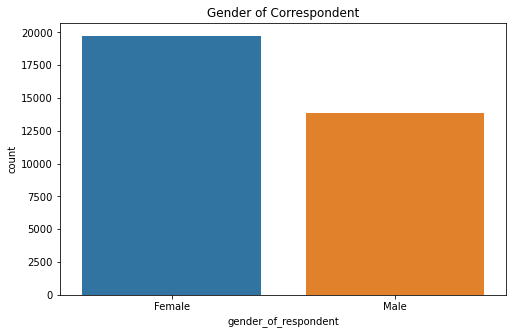

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender_of_respondent', data=df)
plt.title("Gender of Correspondent")

#### The number of female data collected is greater than that of the male counterpart.

### Data Preprocessing

In [13]:
df = pd.get_dummies(df, columns=['country', 'relationship_with_head', 'marital_status', 'education_level'])

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['location_type', 'cellphone_access', 'gender_of_respondent', 'job_type']
for col in cols:
    df[col] =  le.fit_transform(df[col])


In [15]:
df = df.drop(columns=['uniqueid', 'bank_account'])

In [16]:
df.columns

Index(['year', 'location_type', 'cellphone_access', 'household_size',
       'age_of_respondent', 'gender_of_respondent', 'job_type',
       'country_Kenya', 'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'relationship_with_head_Child',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_level_No formal education',
       'education_level_Other/Dont know/RTA',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training'],
      dtype='object')

In [17]:
df.age_of_respondent = np.log1p(df.age_of_respondent)

In [18]:
X = df[:23524]
y = train['bank_account'].map(dict({'Yes' : 1, 'No': 0}))

X_test = df[23524:] 

In [19]:
X.shape, y.shape, X_test.shape

((23524, 28), (23524,), (10086, 28))

### Modelling

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [21]:
skf = StratifiedKFold(n_splits=25, shuffle=True)

In [22]:
# rfc = RandomForestClassifier(n_estimators=500)
# lr = LogisticRegression()
# mms =  MinMaxScaler()

xgb = XGBClassifier()
cbc = CatBoostClassifier(silent=True)
lgb = LGBMClassifier()

In [23]:
clf = VotingClassifier(estimators=[
    ('XGB', xgb),
    ('CBC', cbc),
    ('LGB', lgb)
],
    voting='soft')

In [24]:
pipe = Pipeline([
        ('MMS', MinMaxScaler()),
        ('CLF', clf)
    ])

In [25]:
preds, val_errors = [], []
i=1
for train_index, test_index in skf.split(X, y):
    X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train, y_train)
    print('Number of split trained: ', i)
    val_preds = pipe.predict(X_val)
    val_error = 1 - accuracy_score(y_val, val_preds)
    print("Validation error: ", val_error)
    final_preds = pipe.predict_proba(X_test)[:, 1]
    val_errors.append(val_error)
    preds.append(final_preds)
    i = i + 1
#     error pro'RFC', rfc)b
np.mean(val_errors)

C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  1
Validation error:  0.10839532412327313


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  2
Validation error:  0.12327311370882044


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  3
Validation error:  0.10095642933049942


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:16:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  4
Validation error:  0.11370882040382568


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  5
Validation error:  0.10626992561105209


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  6
Validation error:  0.11264612114771522


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  7
Validation error:  0.12327311370882044


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  8
Validation error:  0.12114771519659939


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  9
Validation error:  0.10520722635494151


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  10
Validation error:  0.10201912858661


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  11
Validation error:  0.1094580233793836


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:19:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  12
Validation error:  0.11902231668437835


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  13
Validation error:  0.11370882040382568


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  14
Validation error:  0.11902231668437835


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  15
Validation error:  0.12539851222104148


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  16
Validation error:  0.10733262486716255


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  17
Validation error:  0.11583421891604673


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  18
Validation error:  0.1168969181721573


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:21:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  19
Validation error:  0.12008501594048882


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  20
Validation error:  0.11264612114771522


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:22:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  21
Validation error:  0.09989373007438895


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:22:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  22
Validation error:  0.11477151965993626


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  23
Validation error:  0.11052072263549417


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  24
Validation error:  0.10414452709883104


C:\Users\ADEDEJI DAMISOLA J\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:23:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Number of split trained:  25
Validation error:  0.1063829787234043


0.11248061139123162

In [26]:
import pickle
pickle_out = open("inclusion__classifier.pkl", mode="wb")
pickle.dump(pipe, pickle_out)
pickle_out.close()

In [27]:
preds_mean = np.mean(preds, axis=0) #Prediction average per row
final = [] #List to store final prediction
for x in preds_mean:
    if x >= 0.5:
        final.append(1)
    else:
        final.append(0)

In [28]:
submission_file.bank_account = final
submission_file.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1
1,uniqueid_6722 x Kenya,1
2,uniqueid_6714 x Kenya,0
3,uniqueid_8103 x Kenya,0
4,uniqueid_8657 x Kenya,0


In [29]:
%%writefile app2.py


import pickle
import pandas as pd
import numpy as np
import streamlit as st

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

st.write("""
# Financial Inclusion Prediction Application

This is a machine learning web application that predict who is mostly likely to have a bank account

Data is obtained from Zindi
""")

st.sidebar.header('User Input Features')
# st.sidebar.markdown("""
# [Example CSV input file](https://raw.githubusercontent.com/)
# """)

# Collects user input features into dataframe
uploaded_file = st.sidebar.file_uploader("Upload your input CSV file ", type=["csv"])
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
else:
    def user_input_features():
        country = st.sidebar.selectbox('Country', ('Rwanda', 'Tanzania', 'Kenya', 'Uganda'))
        year = st.sidebar.selectbox('Year', (2016, 2017, 2018))
        location_type = st.sidebar.selectbox('Location Type', ('Rural', 'Urban'))
        cellphone_access = st.sidebar.selectbox('Cellphone Access', ('Yes', 'No'))
        household_size = st.sidebar.slider('Household Size', 1, 50, 1)
        age_of_respondent = st.sidebar.slider('Age of Respondent', 1, 100, 16)
        gender_of_respondent = st.sidebar.selectbox('Gender of Respondent', ('Female', 'Male'))
        relationship_with_head = st.sidebar.selectbox('Relationship with Head', ('Head of Household', 'Spouse', 'Child', 'Parent', 'Other relative', 'Other non-relatives'))
        marital_status = st.sidebar.selectbox('Marital Status', ('Married/Living together', 'Single/Never Married', 'Widowed', 'Divorced/Seperated', 'Dont know'))
        education_level = st.sidebar.selectbox('Education Level', ('Primary education', 'No formal education', 'Secondary education', 'Tertiary education', 'Vocational/Specialised training', 'Other/Dont know/RTA'))
        data = {
            'country': country,
            'year': year,
            'location_type': location_type,
            'cellphone_access': cellphone_access,
            'household_size': household_size,
            'age_of_respondent': age_of_respondent,
            'gender_of_respondent': gender_of_respondent,
            'relationship_with_head': relationship_with_head,
            'marital_status': marital_status,
            'education_level': education_level
        }
        features = pd.DataFrame(data, index=[0])
        return features
    input_df = user_input_features()

# Combine user input features with the entire dataset
train_df = pd.read_csv('train_v2.csv')
train = train_df.drop(columns=['uniqueid', 'bank_account'])
df = pd.concat([input_df, train])

df_used = df.copy()[:1]
# Log transformation of skewed feature
df.age_of_respondent = np.log1p(df.age_of_respondent)

# One Hot Encoding
df = pd.get_dummies(df, columns=['country', 'relationship_with_head', 'marital_status', 'education_level'])

# Label Encoding
le = LabelEncoder()
cols = ['location_type', 'cellphone_access', 'gender_of_respondent', 'job_type']
for col in cols:
    df[col] =  le.fit_transform(df[col])
df = df[:1] #Select the  first row i.e input data row

#Display user input
st.subheader('User Input Features')
if uploaded_file is not None:
    st.write(df_used)
else:
    st.write('Using the sample data shown below')
    st.write(df_used)
    
#Read saved classification model
pickle_in = open("inclusion__classifier.pkl", 'rb')
load_clf = pickle.load(pickle_in)

#Apply model to make predictions
prediction = load_clf.predict_proba(df)[:, 1]
st.subheader('Prediction Probability')
if prediction >= 0.5:
    st.write('The user has a bank account.', 1)
else:
    st.write('The user does not have a bank account.', 0)


Writing app2.py


In [30]:
!streamlit run app2.py

^C
